# Introduction
I chose the Yelp dataset for this project because of the significant role that online reviews play in today's digital economy. Reviews have transformed the way consumers make decisions, from choosing a restaurant for dinner to selecting a hotel for vacation. Businesses, in turn, have to pay close attention to their online reviews as they can significantly impact their reputation and bottom line. Therefore, understanding and predicting the sentiment behind these reviews can provide invaluable insights for both consumers and businesses. For businesses, specifically, this can guide improvements and optimizations in their service. For consumers, understanding these nuances can help make more informed decisions.


# Hypothesis
My initial hypothesis was that there would be a strong positive correlation between the sentiment score of a review, as quantified by an AFINN score, and the star rating that a reviewer provides. In other words, I expected reviews with a higher sentiment score, indicating more positive language, to generally correspond with a higher star rating. Similarly, I expected reviews with a lower sentiment score, indicating more negative language, to generally correspond with a lower star rating. However, I was also aware that there might be nuances and complexities in language, such as sarcasm or irony, that might lead to discrepancies between sentiment scores and star ratings.


# Data Sourcing and Formatting

In this section, I first sourced the Yelp data and converted it from JSON to CSV. Following this, I re-indexed the data to have the review number as the index. 

In [ ]:
import json

with open('./yelp_dataset/yelp_academic_dataset_business.json') as f:
    business_data = []
    for line in f:
        if line.strip():  # Check if the line is not empty
            obj = json.loads(line)
            business_data.append(obj)

print(len(business_data))

In [8]:
# Print the first 2 entries in the JSON, formatted for readability
print(json.dumps(business_data[0:2], indent=4, sort_keys=True))

[
    {
        "address": "1616 Chapala St, Ste 2",
        "attributes": {
            "ByAppointmentOnly": "True"
        },
        "business_id": "Pns2l4eNsfO8kk83dixA6A",
        "categories": "Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists",
        "city": "Santa Barbara",
        "hours": null,
        "is_open": 0,
        "latitude": 34.4266787,
        "longitude": -119.7111968,
        "name": "Abby Rappoport, LAC, CMQ",
        "postal_code": "93101",
        "review_count": 7,
        "stars": 5.0,
        "state": "CA"
    },
    {
        "address": "87 Grasso Plaza Shopping Center",
        "attributes": {
            "BusinessAcceptsCreditCards": "True"
        },
        "business_id": "mpf3x-BjTdTEA3yCZrAYPw",
        "categories": "Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services",
        "city": "Affton",
        "hours": {
            "Friday": "8:0-18:30",
            "Mo

In [4]:
import csv

# Open the CSV file in write mode
with open('./csv/yelp_business.csv', 'w', newline='') as file:
    fieldnames = business_data[0].keys()
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    # Write the header row
    writer.writeheader()

    # Write the data rows
    writer.writerows(business_data)

In [9]:
import pandas as pd
business = pd.read_csv('./csv/yelp_business.csv')
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [10]:
business.shape

(150346, 14)

In [11]:
import json

def conv_json_to_csv(inFile, outFile):
    with open(inFile) as f:
        data = []
        for line in f:
            if line.strip():  # Check if the line is not empty
                obj = json.loads(line)
                data.append(obj)

    # Open the CSV file in write mode
    with open(outFile, 'w', newline='') as file:
        fieldnames = data[0].keys()
        writer = csv.DictWriter(file, fieldnames=fieldnames)

        # Write the header row
        writer.writeheader()

        # Write the data rows
        writer.writerows(data)
        
conv_json_to_csv('./yelp_dataset/yelp_academic_dataset_checkin.json', 'csv/yelp_checkin.csv')
conv_json_to_csv('./yelp_dataset/yelp_academic_dataset_review.json', 'csv/yelp_review.csv')
conv_json_to_csv('./yelp_dataset/yelp_academic_dataset_tip.json', 'csv/yelp_tip.csv')
conv_json_to_csv('./yelp_dataset/yelp_academic_dataset_user.json', 'csv/yelp_user.csv')

# Exploration

To convert the remainder of the JSON files, I created a function and called it on each of the files from the dataset

In [17]:
checkin = pd.read_csv('./csv/yelp_checkin.csv')
print(checkin.columns)
checkin.head()

Index(['business_id', 'date'], dtype='object')


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [18]:
tip = pd.read_csv('./csv/yelp_tip.csv')
print(tip.columns)
tip[tip['compliment_count']>1]

Index(['user_id', 'business_id', 'text', 'date', 'compliment_count'], dtype='object')


,user_id,business_id,text,date,compliment_count
2249,vZWNh7DMwYVgz3sz-JudwQ,Mm2ezriGaCboSy3FuX-WmQ,Closed down,2015-05-27 03:21:34,2
5936,fWmKFCf6QUJ-6GByXsN-Eg,1QQTCX8HOdIiCkaGJzWFpg,They haven't invested in a scanner yet so if y...,2013-06-09 18:27:08,2
6042,L4iT9ZCNxS2YxTzc2G5ucg,1Efad30BdOeqqjX2d6P4sw,I honestly love the atmosphere the hospitality...,2014-08-23 16:40:01,3
7661,qjfMBIZpQT9DDtw_BWCopQ,RC6M67O4ezJH5xP55TQMzA,Take a pic of what you order. It will help you...,2015-01-23 02:41:15,2
7753,lRRuTimITgwzoXLIM3g9qw,T9C1od-JorSPXwXgzSqM9Q,Only in Philly can you park at 1:30am to picku...,2013-06-03 05:46:12,2
...,...,...,...,...,...
899165,wQY6P6-1mlRBza7PpNtCag,bsKEZroj2sUtLG3y3gQTWg,Who wouldn't want to have an affair? Pretty sa...,2015-07-04 13:20:56,2
900322,jt5uC-YUKSBYFjZyh7CzSQ,-rCB_kCW-u84S-CQir-lng,Someone told me that it was going to be hard f...,2013-08-13 21:40:53,2
902281,qKiJJdZNN8pOIbU1jPWsZw,wuvBkxAjbo-LCBWEw-BKag,I used to work here...trust me...a complete sc...,2015-04-06 18:43:19,2
904213,TaPPY4RARonNBCCk4-umIw,QHWYlmVbLC3K6eglWoHVvA,Sooo hungry!!,2012-08-06 17:34:28,2


In [12]:
reviews = pd.read_csv('csv/yelp_review.csv')
print(reviews.columns)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [20]:
user = pd.read_csv('./csv/yelp_user.csv')
print(user.columns)
user.head()

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,NaN,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [21]:
checkin = pd.read_csv('./csv/yelp_checkin.csv')
print(checkin.columns)
checkin.head()

Index(['business_id', 'date'], dtype='object')


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


# Narrowing the Data set

Instead of performing my analysis over all reviews, I wanted to pick out a restaurant or set of restaurants that had a high number of reviews to narrow my dataset

In [14]:
business[business["review_count"]>1000]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
181,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,2800 Opryland Dr,Nashville,TN,37214,36.211592,-86.694319,3.0,1639,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Venues & Event Spaces, Performing Arts, Arts &...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
957,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsReser...","Bars, Breakfast & Brunch, Restaurants, Barbequ...","{'Wednesday': '11:30-20:0', 'Thursday': '11:30..."
1971,8uF-bhJFgT4Tn6DTb27viA,District Donuts Sliders Brew,2209 Magazine St,New Orleans,LA,70130,29.929426,-90.077069,4.5,2062,1,"{'RestaurantsPriceRange2': '1', 'RestaurantsRe...","Food, Donuts, Burgers, American (Traditional),...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ..."
2380,UCMSWPqzXjd7QHq7v8PJjQ,Prep & Pastry,2660 N Campbell Ave,Tucson,AZ,85719,32.255528,-110.943492,4.5,2126,1,"{'Alcohol': ""u'full_bar'"", 'BikeParking': 'Tru...","Restaurants, Cocktail Bars, Bars, Comfort Food...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-15:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148413,-lX4ufgPLYubI8rVxNM31w,New Orleans Creole Cookery,508 Toulouse St,New Orleans,LA,70130,29.956083,-90.064039,3.5,1232,1,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Restaurants, Seafood, Vegetarian, American (Tr...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
148506,fVUurZgbWXzp2QzDzJzmpA,Pickles & Swiss,"811 State St, unit E",Santa Barbara,CA,93101,34.419602,-119.700150,4.5,1213,1,"{'WiFi': ""u'no'"", 'RestaurantsGoodForGroups': ...","Delis, Gluten-Free, Fast Food, Salad, Sandwich...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-17:0', ..."
148829,1b5mnK8bMnnju_cvU65GqQ,Biscuit Love: Gulch,316 11th Ave S,Nashville,TN,37203,36.153050,-86.783231,4.0,4207,1,"{'NoiseLevel': ""'average'"", 'HasTV': 'False', ...","Burgers, American (Traditional), Breakfast & B...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-15:0', '..."
148845,hy-E7DdXbdgTbwphKUYW1w,Haunted History Tours,723 Saint Peter St,New Orleans,LA,70116,29.958378,-90.065165,4.0,1287,1,"{'RestaurantsPriceRange2': '1', 'WheelchairAcc...","Tours, Hotels & Travel, Historical Tours, Perf...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


I wanted to hone in my analysis on restaurants. To ensure I'm not missing any other major categories, I've listed out the vanues that don't include a 'restaurant' category

In [35]:
categories = business[business['review_count']>1000]['categories']
print(len(categories))
count = 0
for i in categories:
    cats_list = i.split(', ')
    if 'Restaurants' not in cats_list:
        print(i)
        count += 1

print("\nVenues that are not restaurants:", count)

315
Event Planning & Services, Casinos, Beauty & Spas, Venues & Event Spaces, Arts & Entertainment, Day Spas, Hotels, Hotels & Travel
Transportation, Boat Tours, Bus Tours, Tours, Walking Tours, Hotels & Travel, Historical Tours
Ice Cream & Frozen Yogurt, Food, Local Flavor, Desserts
Jazz & Blues, Bars, Arts & Entertainment, Beer, Wine & Spirits, Wine Bars, Food, Nightlife
Food, Coffee & Tea
Professional Services, Airports, Local Services, Hotels & Travel
Casinos, Hotels & Travel, Arts & Entertainment, Resorts, Beauty & Spas, Day Spas
Bars, Lounges, Nightlife
Nightlife, Local Flavor, Dive Bars, Bars
Hotels & Travel, Shopping, Airports, Parking, Shopping Centers, Automotive
Hotels & Travel, Arts & Entertainment, Tours, Public Services & Government, Landmarks & Historical Buildings, Museums
Hotels & Travel, Airports, Transportation
Food, Ice Cream & Frozen Yogurt, Desserts
Nightlife, Hotels & Travel, Arts & Entertainment, Music Venues, Hotels, Casinos, Event Planning & Services, Resorts


In [36]:
business_restaurants = business[(business['categories'].str.contains('Restaurants', case=False, na=False)) & (business['review_count'] >= 1000)]
business_restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
181,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,2800 Opryland Dr,Nashville,TN,37214,36.211592,-86.694319,3.0,1639,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Venues & Event Spaces, Performing Arts, Arts &...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
957,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsReser...","Bars, Breakfast & Brunch, Restaurants, Barbequ...","{'Wednesday': '11:30-20:0', 'Thursday': '11:30..."
1971,8uF-bhJFgT4Tn6DTb27viA,District Donuts Sliders Brew,2209 Magazine St,New Orleans,LA,70130,29.929426,-90.077069,4.5,2062,1,"{'RestaurantsPriceRange2': '1', 'RestaurantsRe...","Food, Donuts, Burgers, American (Traditional),...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ..."
2380,UCMSWPqzXjd7QHq7v8PJjQ,Prep & Pastry,2660 N Campbell Ave,Tucson,AZ,85719,32.255528,-110.943492,4.5,2126,1,"{'Alcohol': ""u'full_bar'"", 'BikeParking': 'Tru...","Restaurants, Cocktail Bars, Bars, Comfort Food...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-15:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147858,VAeEXLbEcI9Emt9KGYq9aA,The Pharmacy,731 McFerrin Ave,Nashville,TN,37206,36.184936,-86.754188,4.0,3054,1,"{'OutdoorSeating': 'True', 'RestaurantsGoodFor...","Burgers, Sandwiches, Food, Beer, Wine & Spirit...","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
148413,-lX4ufgPLYubI8rVxNM31w,New Orleans Creole Cookery,508 Toulouse St,New Orleans,LA,70130,29.956083,-90.064039,3.5,1232,1,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Restaurants, Seafood, Vegetarian, American (Tr...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
148506,fVUurZgbWXzp2QzDzJzmpA,Pickles & Swiss,"811 State St, unit E",Santa Barbara,CA,93101,34.419602,-119.700150,4.5,1213,1,"{'WiFi': ""u'no'"", 'RestaurantsGoodForGroups': ...","Delis, Gluten-Free, Fast Food, Salad, Sandwich...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-17:0', ..."
148829,1b5mnK8bMnnju_cvU65GqQ,Biscuit Love: Gulch,316 11th Ave S,Nashville,TN,37203,36.153050,-86.783231,4.0,4207,1,"{'NoiseLevel': ""'average'"", 'HasTV': 'False', ...","Burgers, American (Traditional), Breakfast & B...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-15:0', '..."


To get a dataset with a good range of star ratings, lets choose a restaurant with less than 4 star rating. Lets get the restaurants with the most reviews.

In [37]:
business[business['stars']<4].sort_values('review_count', ascending=False)[:10]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
100024,iSRTaT9WngzB8JJ2YKJUig,Mother's Restaurant,401 Poydras St,New Orleans,LA,70130,29.949057,-90.067049,3.5,5185,1,"{'RestaurantsGoodForGroups': 'True', 'BYOBCork...","Cajun/Creole, Restaurants, Event Planning & Se...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-17:0', '..."
113983,PP3BBaVxZLcJU54uP_wL6Q,Pat's King of Steaks,1237 E Passyunk Ave,Philadelphia,PA,19147,39.933201,-75.159266,3.0,4250,1,"{'RestaurantsReservations': 'False', 'Corkage'...","Italian, American (Traditional), Sandwiches, F...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
57332,IkY2ticzHEn4QFn8hQLSWg,Geno's Steaks,1219 S 9th St,Philadelphia,PA,19147,39.933837,-75.158814,2.5,3401,1,"{'RestaurantsReservations': 'False', 'Corkage'...","Sandwiches, Cheesesteaks, Steakhouses, Restaur...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
103544,wz8ZPfySQczcPgSyd33-HQ,Grand Sierra Resort and Casino,2500 E 2nd St,Reno,NV,89595,39.523349,-119.781101,3.0,3345,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Nightlife, Hotels & Travel, Arts & Entertainme...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
17899,DcBLYSvOuWcNReolRVr12A,Drago's Seafood Restaurant,2 Poydras St,New Orleans,LA,70140,29.947563,-90.063311,3.5,3160,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Restaurants, Seafood","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
71145,XnQ84ylyAZwh-XfHGGNBbQ,Coop's Place,1109 Decatur St,New Orleans,LA,70116,29.960157,-90.059854,3.5,3157,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsTa...","Cajun/Creole, Nightlife, Bars, Restaurants","{'Monday': '11:0-23:0', 'Thursday': '11:0-23:0..."
53452,sTPueJEwcRDj7ZJmG7okYA,Jim's South St,400 S St,Philadelphia,PA,19147,39.941498,-75.149272,3.5,2736,1,"{'BusinessParking': ""{'garage': False, 'street...","Bars, Restaurants, Pizza, Cheesesteaks, Italia...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '..."
48724,RLlOK2fL6xU1sfIPiP2QBw,Deanie's Seafood,841 Iberville St,New Orleans,LA,70112,29.955347,-90.069806,3.5,2473,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsReser...","Restaurants, American (Traditional), Food, Fre...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
46923,-QI8Qi8XWH3D8y8ethnajA,Philadelphia International Airport - PHL,8500 Essington Ave,Philadelphia,PA,19153,39.873074,-75.243249,2.5,2149,1,"{'WiFi': ""u'free'"", 'BusinessAcceptsCreditCard...","Professional Services, Airports, Local Service...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
73697,iwmW2mgcn2YdirXUHCsgXQ,Bourbon House,144 Bourbon St,New Orleans,LA,70130,29.954618,-90.069180,3.5,2026,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Restaurants, Cajun/Creole, Seafood","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


Let's take the top 5 reviewed restaurants from this table, and look at the distribution of star ratings

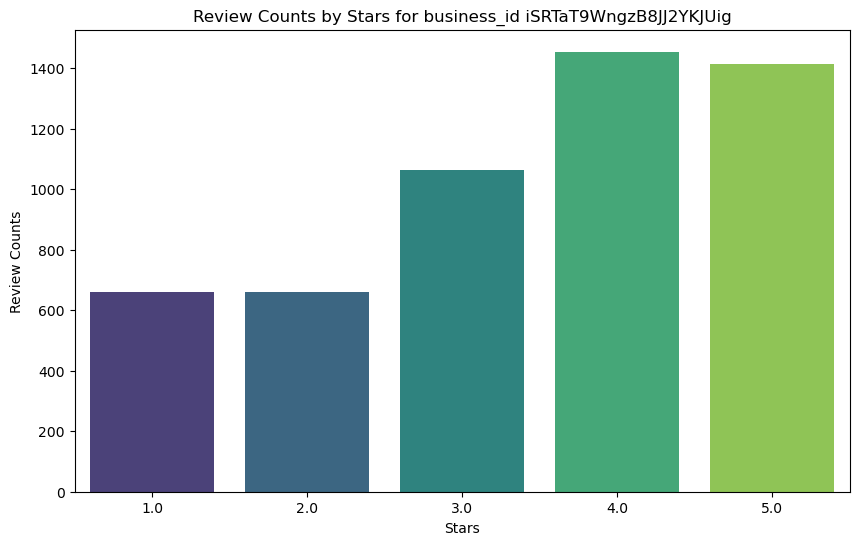

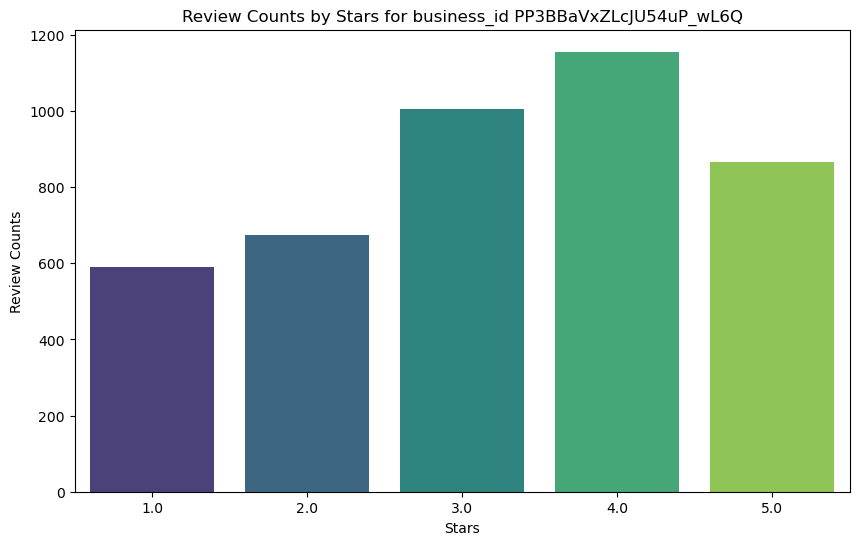

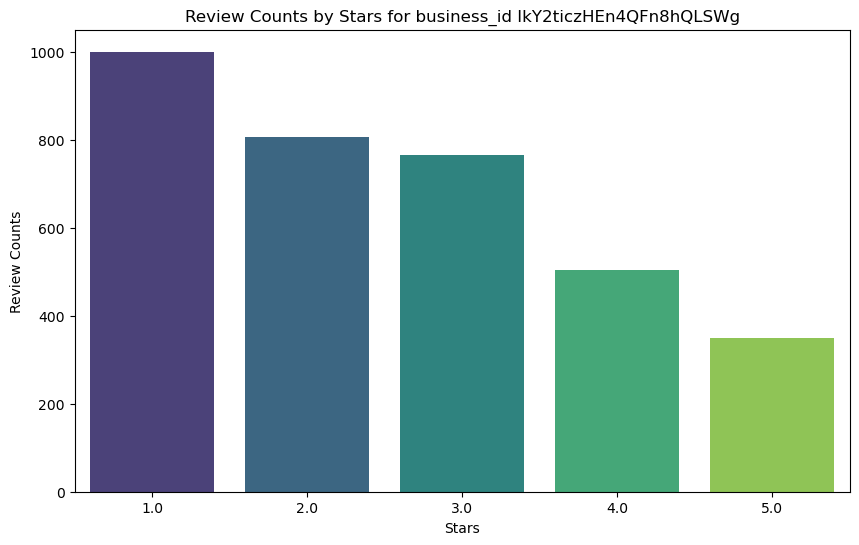

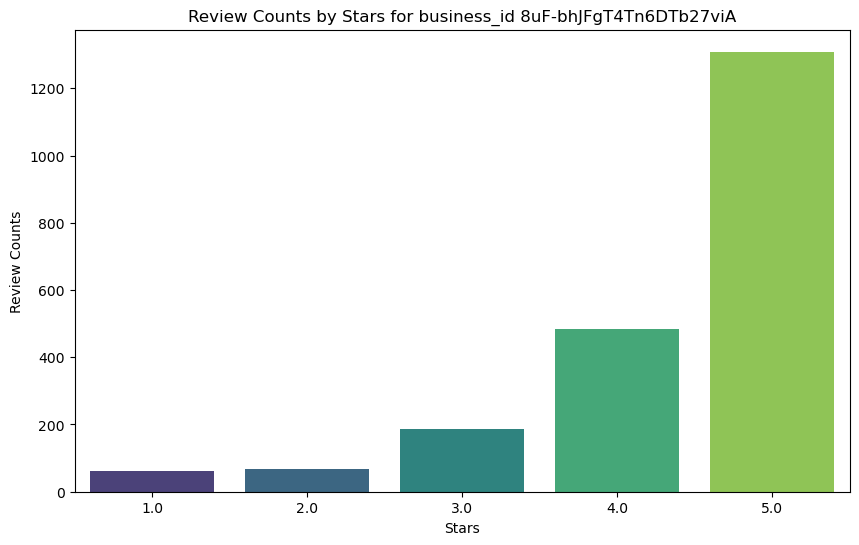

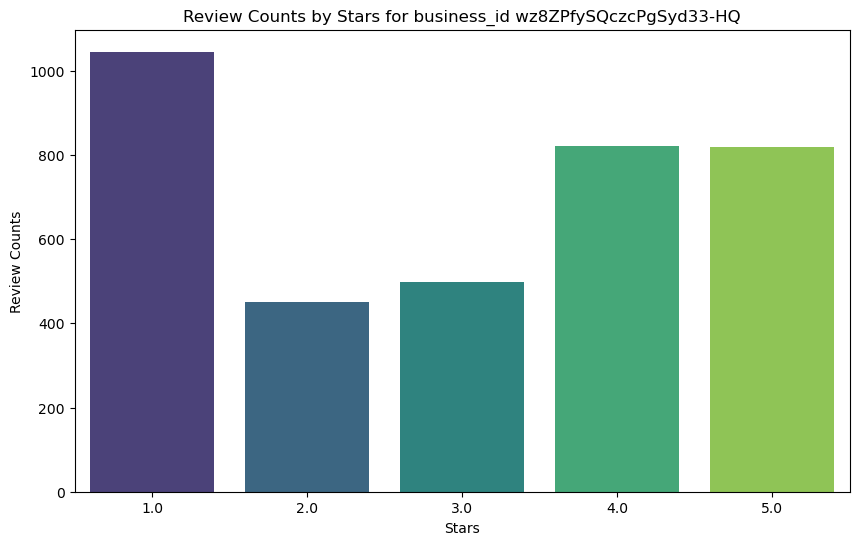

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

ids = ['iSRTaT9WngzB8JJ2YKJUig','PP3BBaVxZLcJU54uP_wL6Q','IkY2ticzHEn4QFn8hQLSWg', 
       '8uF-bhJFgT4Tn6DTb27viA','wz8ZPfySQczcPgSyd33-HQ']

# Loop through each id in the ids list
for business_id in ids:      
    # Subset the reviews dataframe to include only reviews for the current business_id
    subset_reviews = reviews[reviews['business_id'] == business_id]
    
    # Plot the bar graph
    plt.figure(figsize=(10,6))
    sns.countplot(x='stars', data=subset_reviews, palette='viridis')
    plt.title(f'Review Counts by Stars for business_id {business_id}')
    plt.xlabel('Stars')
    plt.ylabel('Review Counts')
    plt.show()


For the sake of this analysis, most choices have sufficient data in all star amounts. We'll take "Mother's Restaurant" as it has the most reviews in each category

In [43]:
mother = reviews[reviews['business_id']=='iSRTaT9WngzB8JJ2YKJUig']

Lets also write this out to CSV so we can come back later

In [81]:
mother.to_csv('./csv/mother_reviews.csv')
mother

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,AFINN score,Review Length (words),AFINN score (abs),Normalised AFINN score,Normalised (abs),SQRT Normailzed,SQRT Normalised (abs)
4177277,7OGJcQcbxTWzE1z1_UrmMw,I3f0Ww0Fh5-ixwxMQ5L1Cg,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,A visit to New Orleans is not complete without...,2015-11-06 01:44:28,4.0,383,4.0,0.052632,0.052632,0.204390,0.204390
4177487,Mx0TaJzAU6HJHzEZQjXWfA,wgtJ6oS_VIZT_yVz3N5w3Q,iSRTaT9WngzB8JJ2YKJUig,4.0,0,0,0,The Ferdi was only amazing because of the debr...,2012-12-04 22:34:30,5.0,216,5.0,0.125000,0.125000,0.340207,0.340207
4177714,MdOQyLBT5ro3yCvtMiI-nQ,9BzlclzAH_XdTOijPQZaOw,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,This is a regular stop for me when I am in new...,2016-06-12 00:55:19,6.0,257,6.0,0.120000,0.120000,0.374270,0.374270
4177784,oYzqWxH6tDMSVQTNHCoOAA,9jWSprR9OJL4WW1P5iGToQ,iSRTaT9WngzB8JJ2YKJUig,1.0,1,0,0,This place gave my fiancé food poisoning today...,2016-01-04 02:48:37,-4.0,147,4.0,-0.153846,0.153846,-0.329914,0.329914
4177849,2uG8E1o4KTUDn47RB9JaVA,_KNqLK8xC4xBOCz3Q7MOag,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,I tried the spaghetti and meatballs. It was a ...,2018-06-08 22:29:13,9.0,147,9.0,0.360000,0.360000,0.742307,0.742307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880478,bIbJqBreln8Ai9CbY13AuQ,n-6gqoEP9uQQBUnbKIu3RQ,iSRTaT9WngzB8JJ2YKJUig,4.0,1,0,1,I came for the oyster po-boy and it did not di...,2017-11-20 06:35:37,3.0,170,3.0,0.085714,0.085714,0.230089,0.230089
4880861,IW2iTKvna_F7vBrG3m4XyA,u7Zm1dTW2uLQhMXuazi9dg,iSRTaT9WngzB8JJ2YKJUig,3.0,3,0,0,Overrated and pretty ordinary Cajun food rattl...,2021-08-19 18:33:58,5.0,105,5.0,0.277778,0.277778,0.487950,0.487950
4881067,5V74xBH_0CIiVrESPSoLjQ,IoZfBwHCO244npWM6EVhZA,iSRTaT9WngzB8JJ2YKJUig,1.0,2,0,0,Total tourist trap. Avoid. Prices are high; fo...,2018-03-12 15:32:26,-2.0,98,2.0,-0.142857,0.142857,-0.202031,0.202031
4881268,gUi186cOoWWe3OdVd2Cgag,hPUvonMwlxn_uX3UE13gzA,iSRTaT9WngzB8JJ2YKJUig,3.0,1,0,0,I truly do not understand the hype of this pla...,2021-08-23 03:48:09,6.0,318,6.0,0.093750,0.093750,0.336463,0.336463


# Exploratory Analysis

To better understand the data, I performed some exploratory analysis. I created visuals such as a bar chart showing the value counts for reviews in each star rating and a word cloud displaying the most frequently used words in the reviews.


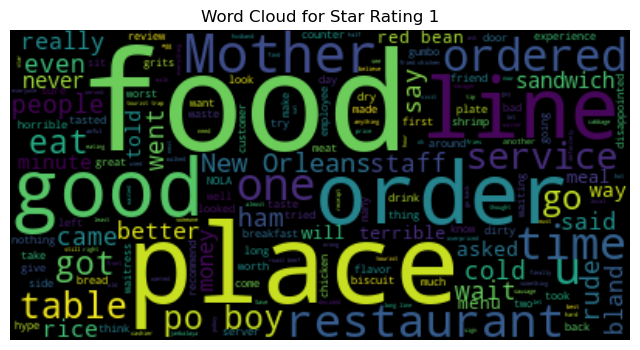

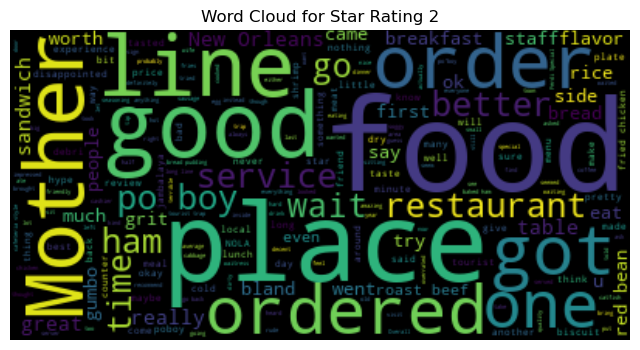

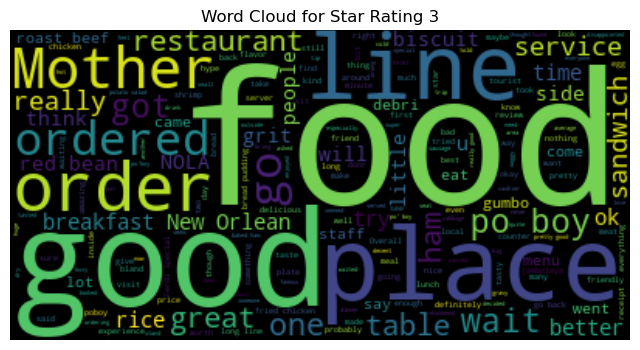

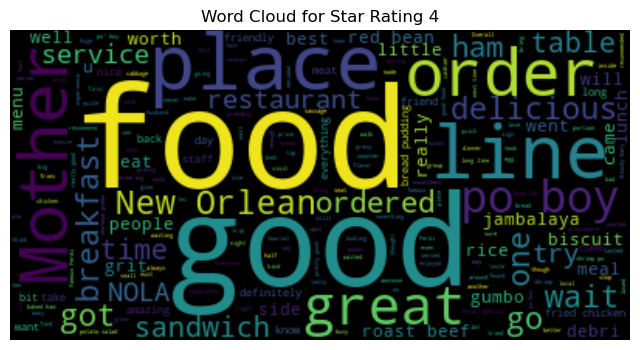

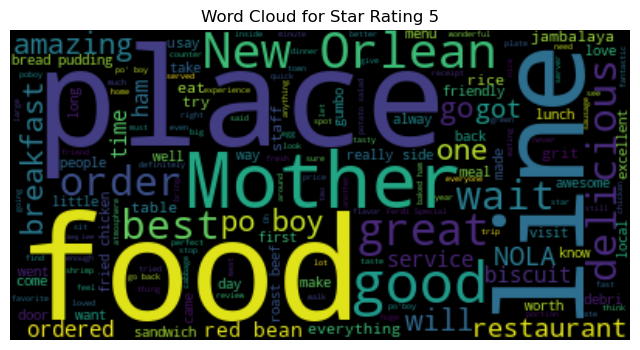

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word clouds for each star rating
for i in range(1, 6):
    subset_reviews = mother[mother['stars'] == i]['text']
    wordcloud = WordCloud().generate(' '.join(subset_reviews))
    
    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Star Rating {i}')
    plt.show()

Lets take a look at a word frequency chart

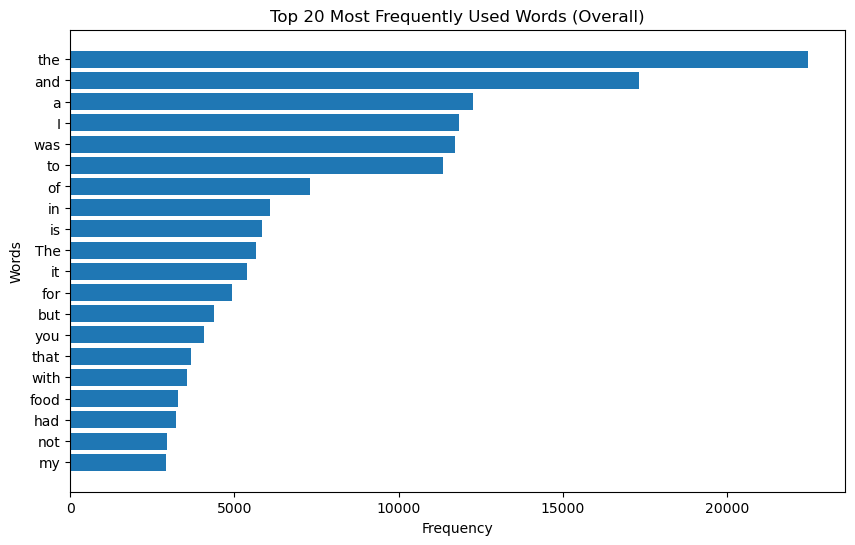

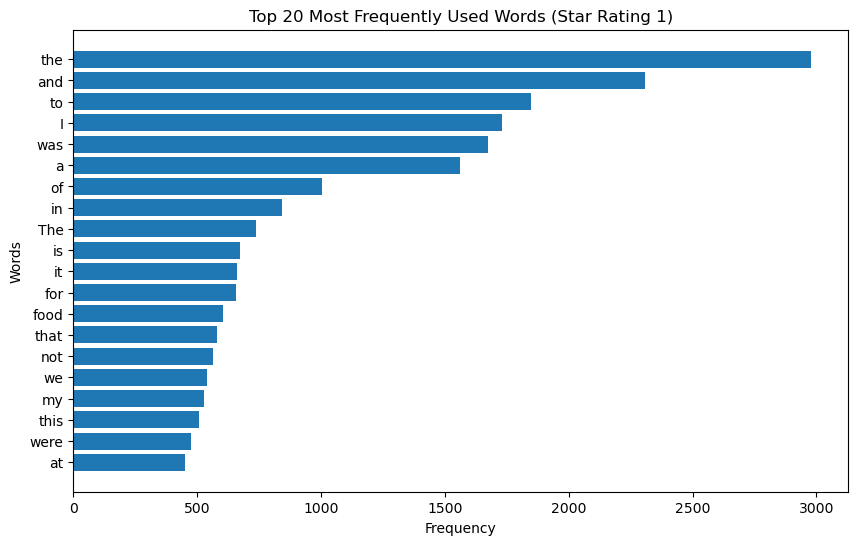

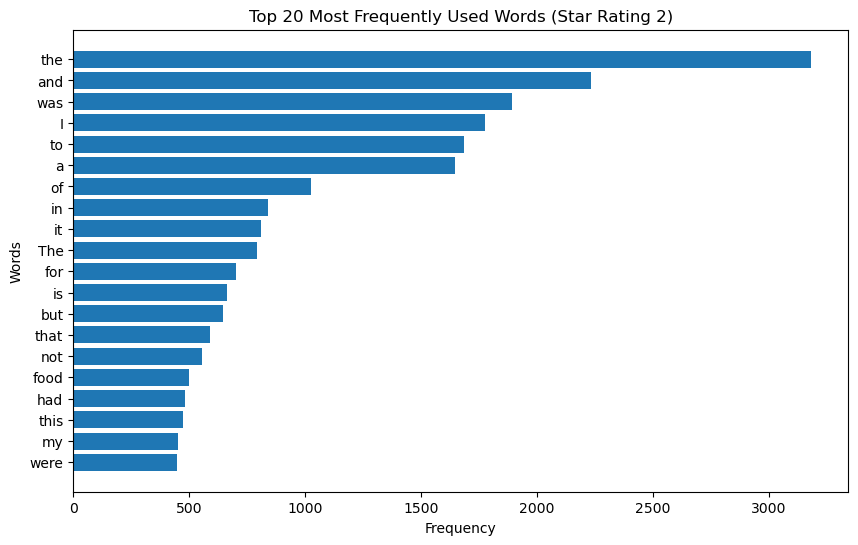

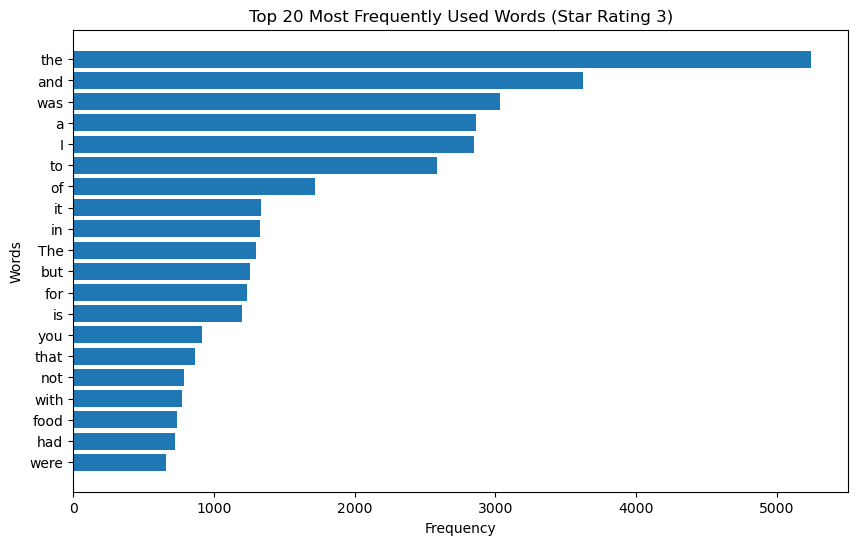

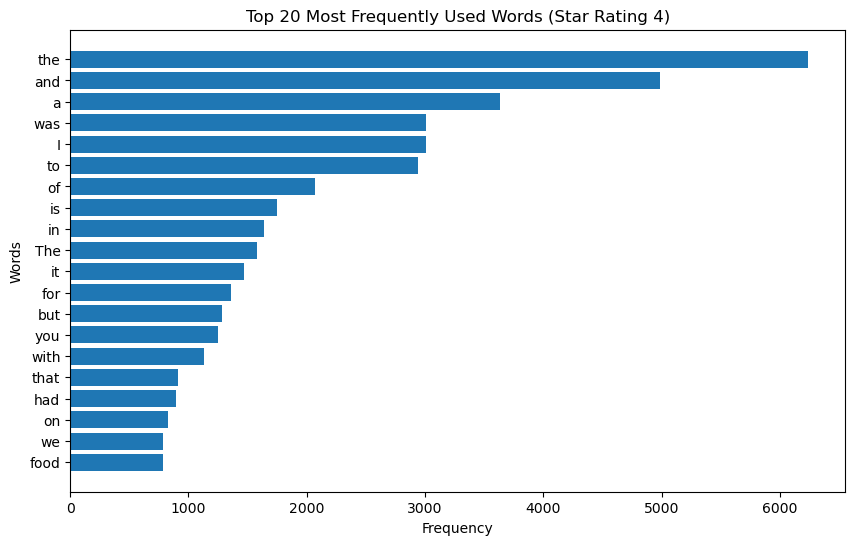

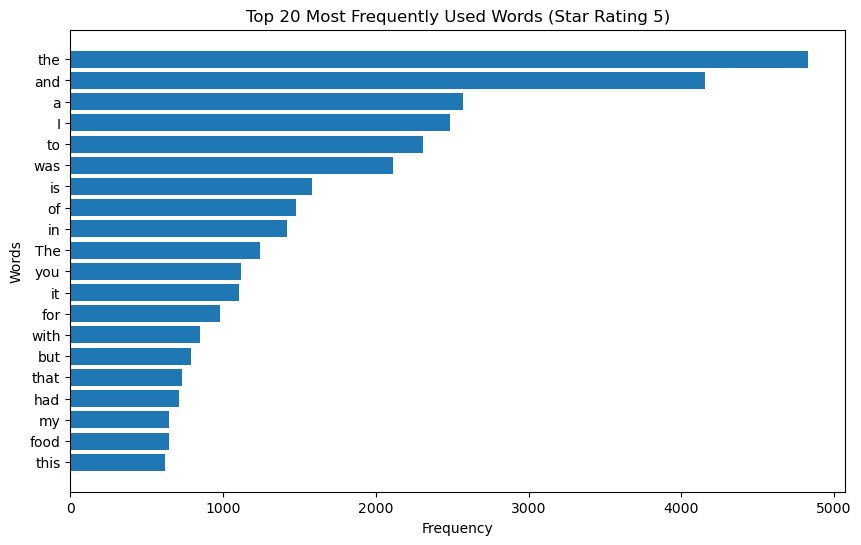

In [46]:
from collections import Counter

# Combine all reviews into a single string
all_reviews = ' '.join(mother['text'])

# Calculate overall word frequencies
overall_word_freq = Counter(all_reviews.split())

# Plot overall frequency bar chart with most frequent words at the top
overall_top_words = overall_word_freq.most_common(20)
overall_words, overall_freq = zip(*overall_top_words)

plt.figure(figsize=(10, 6))
plt.barh(overall_words[::-1], overall_freq[::-1])
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequently Used Words (Overall)')
plt.show()

# Plot frequency bar chart for each star rating with most frequent words at the top
for i in range(1, 6):
    subset_reviews = mother[mother['stars'] == i]['text']
    subset_reviews_combined = ' '.join(subset_reviews)
    subset_word_freq = Counter(subset_reviews_combined.split())
    subset_top_words = subset_word_freq.most_common(20)
    subset_words, subset_freq = zip(*subset_top_words)
    
    plt.figure(figsize=(10, 6))
    plt.barh(subset_words[::-1], subset_freq[::-1])
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top 20 Most Frequently Used Words (Star Rating {i})')
    plt.show()


We're getting a lot of filler words, let see if we can filter those out

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skanangama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


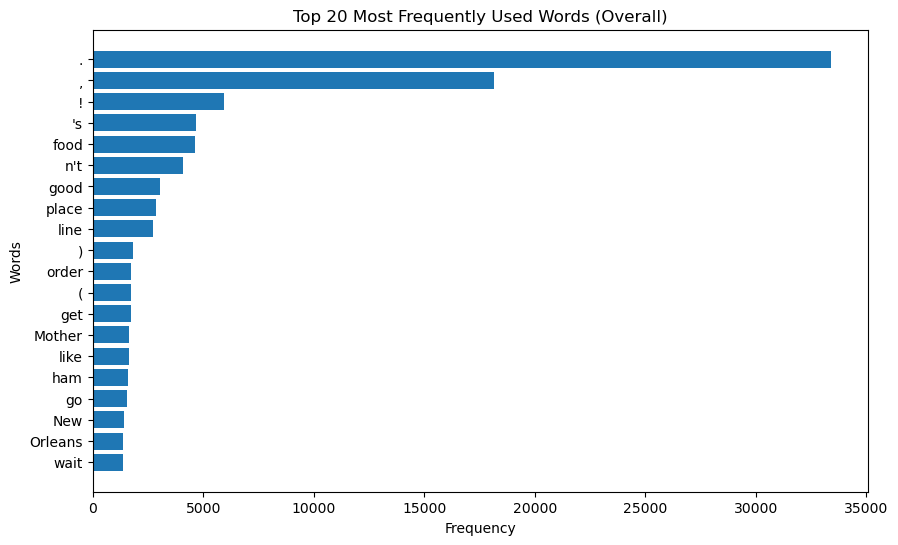

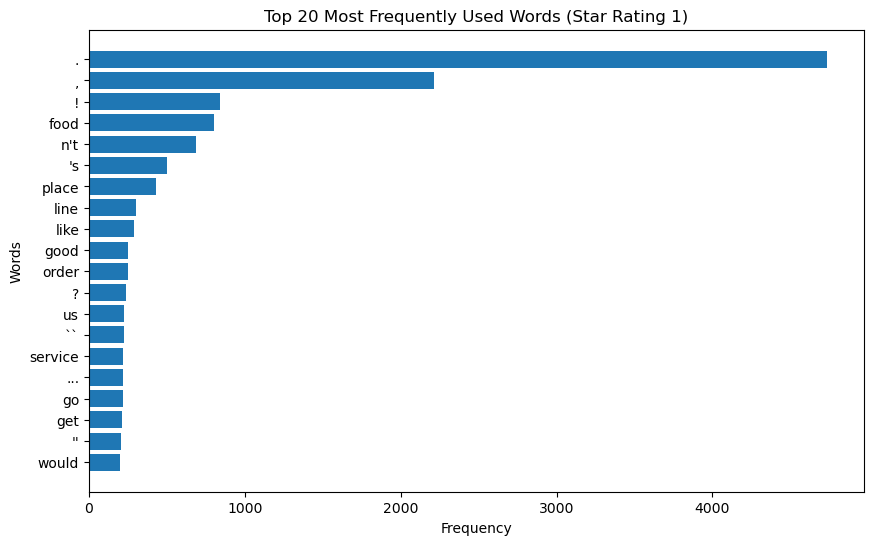

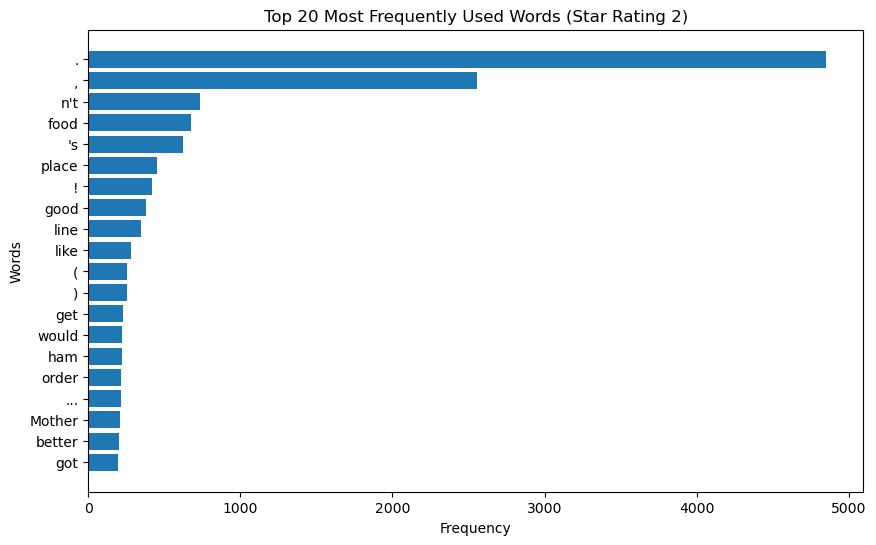

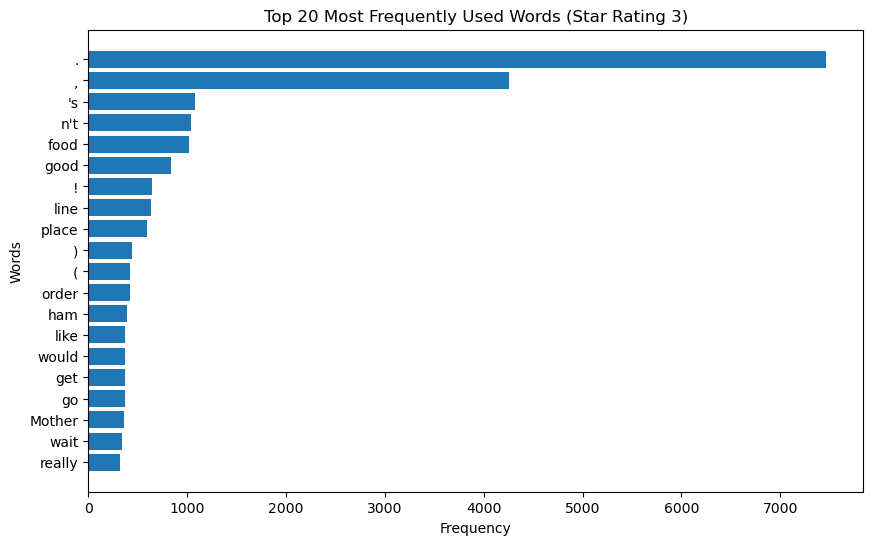

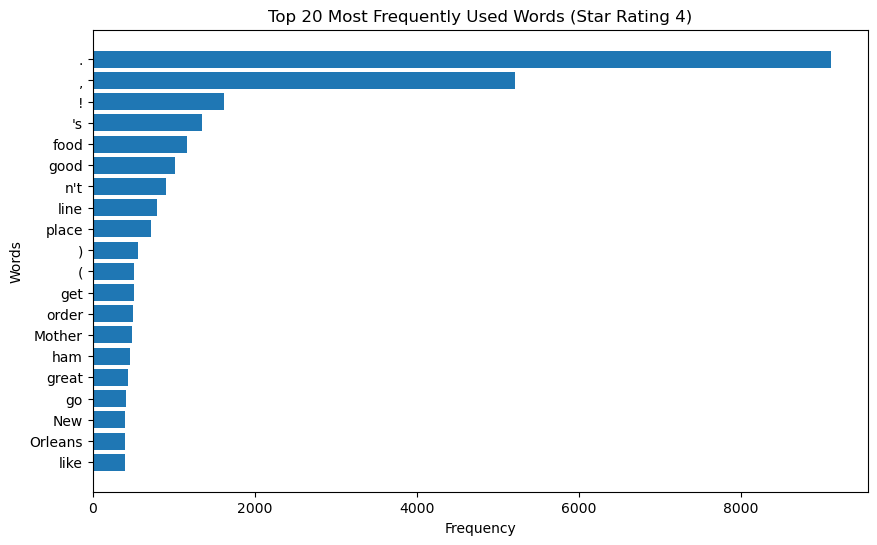

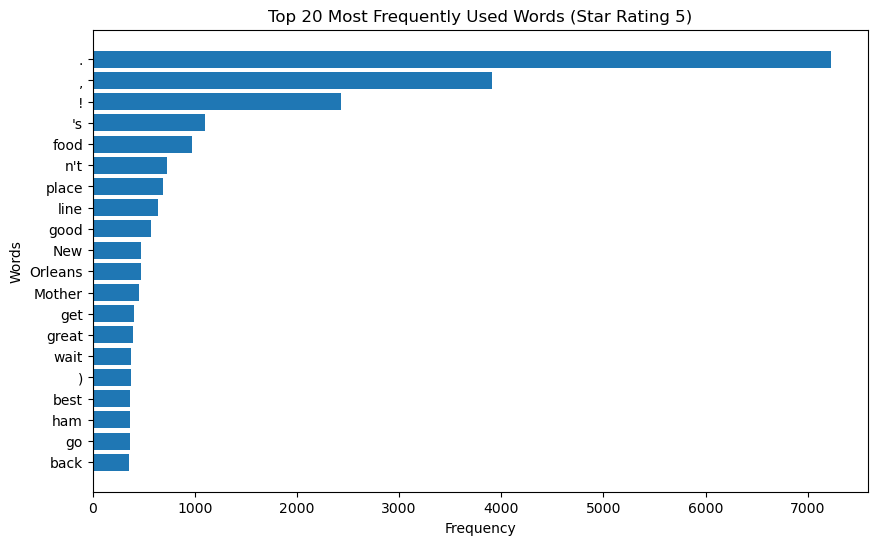

In [48]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Combine all reviews into a single string
all_reviews = ' '.join(mother['text'])

# Tokenize the text
tokens = nltk.word_tokenize(all_reviews)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Calculate overall word frequencies
overall_word_freq = Counter(filtered_tokens)

# Plot overall frequency bar chart with most frequent words at the top
overall_top_words = overall_word_freq.most_common(20)
overall_words, overall_freq = zip(*overall_top_words)

plt.figure(figsize=(10, 6))
plt.barh(overall_words[::-1], overall_freq[::-1])
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequently Used Words (Overall)')
plt.show()

# Plot frequency bar chart for each star rating with most frequent words at the top
for i in range(1, 6):
    subset_reviews = mother[mother['stars'] == i]['text']
    subset_reviews_combined = ' '.join(subset_reviews)
    subset_tokens = nltk.word_tokenize(subset_reviews_combined)
    subset_filtered_tokens = [word for word in subset_tokens if word.lower() not in stop_words]
    subset_word_freq = Counter(subset_filtered_tokens)
    subset_top_words = subset_word_freq.most_common(20)
    subset_words, subset_freq = zip(*subset_top_words)
    
    plt.figure(figsize=(10, 6))
    plt.barh(subset_words[::-1], subset_freq[::-1])
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top 20 Most Frequently Used Words (Star Rating {i})')
    plt.show()


Looks like we're not quite filtering properly. Let's revisit this another time

# Modelling and Validation

To quantify the sentiment of each review, I used the AFINN score, which assigns values to predefined words based on their perceived positivity or negativity.

Let's calculate the AFINN score for each review and add it to the mother dataframe

In [51]:
mother

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,AFINN score
4177277,7OGJcQcbxTWzE1z1_UrmMw,I3f0Ww0Fh5-ixwxMQ5L1Cg,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,A visit to New Orleans is not complete without...,2015-11-06 01:44:28,4.0
4177487,Mx0TaJzAU6HJHzEZQjXWfA,wgtJ6oS_VIZT_yVz3N5w3Q,iSRTaT9WngzB8JJ2YKJUig,4.0,0,0,0,The Ferdi was only amazing because of the debr...,2012-12-04 22:34:30,5.0
4177714,MdOQyLBT5ro3yCvtMiI-nQ,9BzlclzAH_XdTOijPQZaOw,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,This is a regular stop for me when I am in new...,2016-06-12 00:55:19,6.0
4177784,oYzqWxH6tDMSVQTNHCoOAA,9jWSprR9OJL4WW1P5iGToQ,iSRTaT9WngzB8JJ2YKJUig,1.0,1,0,0,This place gave my fiancé food poisoning today...,2016-01-04 02:48:37,-4.0
4177849,2uG8E1o4KTUDn47RB9JaVA,_KNqLK8xC4xBOCz3Q7MOag,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,I tried the spaghetti and meatballs. It was a ...,2018-06-08 22:29:13,9.0
...,...,...,...,...,...,...,...,...,...,...
4880478,bIbJqBreln8Ai9CbY13AuQ,n-6gqoEP9uQQBUnbKIu3RQ,iSRTaT9WngzB8JJ2YKJUig,4.0,1,0,1,I came for the oyster po-boy and it did not di...,2017-11-20 06:35:37,3.0
4880861,IW2iTKvna_F7vBrG3m4XyA,u7Zm1dTW2uLQhMXuazi9dg,iSRTaT9WngzB8JJ2YKJUig,3.0,3,0,0,Overrated and pretty ordinary Cajun food rattl...,2021-08-19 18:33:58,5.0
4881067,5V74xBH_0CIiVrESPSoLjQ,IoZfBwHCO244npWM6EVhZA,iSRTaT9WngzB8JJ2YKJUig,1.0,2,0,0,Total tourist trap. Avoid. Prices are high; fo...,2018-03-12 15:32:26,-2.0
4881268,gUi186cOoWWe3OdVd2Cgag,hPUvonMwlxn_uX3UE13gzA,iSRTaT9WngzB8JJ2YKJUig,3.0,1,0,0,I truly do not understand the hype of this pla...,2021-08-23 03:48:09,6.0


In [ ]:
from afinn import Afinn
afinn = Afinn()
mother.loc[:, 'AFINN score'] = mother.loc[:, 'text'].apply(afinn.score)

In [55]:
mother

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,AFINN score
4177277,7OGJcQcbxTWzE1z1_UrmMw,I3f0Ww0Fh5-ixwxMQ5L1Cg,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,A visit to New Orleans is not complete without...,2015-11-06 01:44:28,4.0
4177487,Mx0TaJzAU6HJHzEZQjXWfA,wgtJ6oS_VIZT_yVz3N5w3Q,iSRTaT9WngzB8JJ2YKJUig,4.0,0,0,0,The Ferdi was only amazing because of the debr...,2012-12-04 22:34:30,5.0
4177714,MdOQyLBT5ro3yCvtMiI-nQ,9BzlclzAH_XdTOijPQZaOw,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,This is a regular stop for me when I am in new...,2016-06-12 00:55:19,6.0
4177784,oYzqWxH6tDMSVQTNHCoOAA,9jWSprR9OJL4WW1P5iGToQ,iSRTaT9WngzB8JJ2YKJUig,1.0,1,0,0,This place gave my fiancé food poisoning today...,2016-01-04 02:48:37,-4.0
4177849,2uG8E1o4KTUDn47RB9JaVA,_KNqLK8xC4xBOCz3Q7MOag,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,I tried the spaghetti and meatballs. It was a ...,2018-06-08 22:29:13,9.0
...,...,...,...,...,...,...,...,...,...,...
4880478,bIbJqBreln8Ai9CbY13AuQ,n-6gqoEP9uQQBUnbKIu3RQ,iSRTaT9WngzB8JJ2YKJUig,4.0,1,0,1,I came for the oyster po-boy and it did not di...,2017-11-20 06:35:37,3.0
4880861,IW2iTKvna_F7vBrG3m4XyA,u7Zm1dTW2uLQhMXuazi9dg,iSRTaT9WngzB8JJ2YKJUig,3.0,3,0,0,Overrated and pretty ordinary Cajun food rattl...,2021-08-19 18:33:58,5.0
4881067,5V74xBH_0CIiVrESPSoLjQ,IoZfBwHCO244npWM6EVhZA,iSRTaT9WngzB8JJ2YKJUig,1.0,2,0,0,Total tourist trap. Avoid. Prices are high; fo...,2018-03-12 15:32:26,-2.0
4881268,gUi186cOoWWe3OdVd2Cgag,hPUvonMwlxn_uX3UE13gzA,iSRTaT9WngzB8JJ2YKJUig,3.0,1,0,0,I truly do not understand the hype of this pla...,2021-08-23 03:48:09,6.0


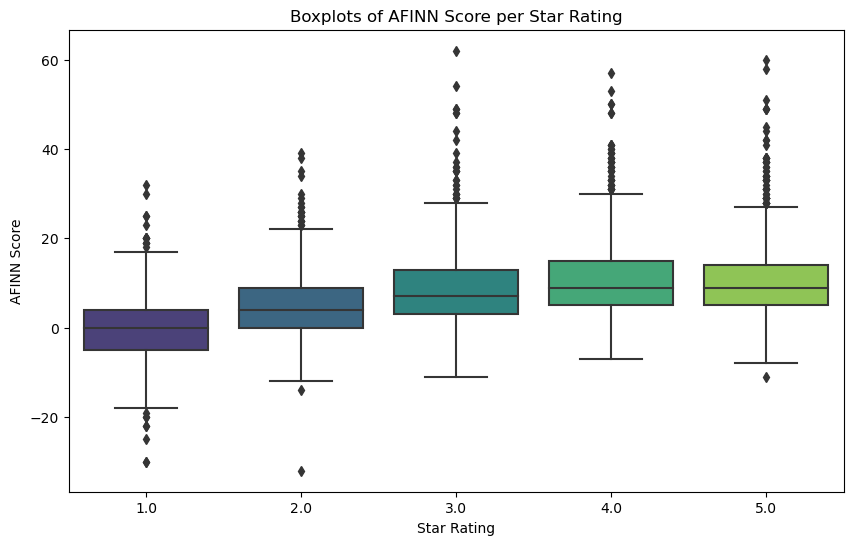

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the size of the figure to better accommodate the plots
plt.figure(figsize=(10,6))

# Prepare box plot
sns.boxplot(x='stars', y='AFINN score', data=mother, palette='viridis')

# Set title, xlabel and ylabel
plt.title('Boxplots of AFINN Score per Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('AFINN Score')

# Display the plot
plt.show()


Looks like 5 star reviews have a lower median than the 4 star reviews. Could there be something else at play here? 

The AFINN score is dependent on the total number of positive and negative words, so a longer review could lead to an increased score. 

Lets Have a look. First we'll add Review Length (Words) to our dataframe

In [61]:
mother["Review Length (words)"] = mother['text'].apply(len)

In [62]:
mother

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,AFINN score,Review Length (words)
4177277,7OGJcQcbxTWzE1z1_UrmMw,I3f0Ww0Fh5-ixwxMQ5L1Cg,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,A visit to New Orleans is not complete without...,2015-11-06 01:44:28,4.0,383
4177487,Mx0TaJzAU6HJHzEZQjXWfA,wgtJ6oS_VIZT_yVz3N5w3Q,iSRTaT9WngzB8JJ2YKJUig,4.0,0,0,0,The Ferdi was only amazing because of the debr...,2012-12-04 22:34:30,5.0,216
4177714,MdOQyLBT5ro3yCvtMiI-nQ,9BzlclzAH_XdTOijPQZaOw,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,This is a regular stop for me when I am in new...,2016-06-12 00:55:19,6.0,257
4177784,oYzqWxH6tDMSVQTNHCoOAA,9jWSprR9OJL4WW1P5iGToQ,iSRTaT9WngzB8JJ2YKJUig,1.0,1,0,0,This place gave my fiancé food poisoning today...,2016-01-04 02:48:37,-4.0,147
4177849,2uG8E1o4KTUDn47RB9JaVA,_KNqLK8xC4xBOCz3Q7MOag,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,I tried the spaghetti and meatballs. It was a ...,2018-06-08 22:29:13,9.0,147
...,...,...,...,...,...,...,...,...,...,...,...
4880478,bIbJqBreln8Ai9CbY13AuQ,n-6gqoEP9uQQBUnbKIu3RQ,iSRTaT9WngzB8JJ2YKJUig,4.0,1,0,1,I came for the oyster po-boy and it did not di...,2017-11-20 06:35:37,3.0,170
4880861,IW2iTKvna_F7vBrG3m4XyA,u7Zm1dTW2uLQhMXuazi9dg,iSRTaT9WngzB8JJ2YKJUig,3.0,3,0,0,Overrated and pretty ordinary Cajun food rattl...,2021-08-19 18:33:58,5.0,105
4881067,5V74xBH_0CIiVrESPSoLjQ,IoZfBwHCO244npWM6EVhZA,iSRTaT9WngzB8JJ2YKJUig,1.0,2,0,0,Total tourist trap. Avoid. Prices are high; fo...,2018-03-12 15:32:26,-2.0,98
4881268,gUi186cOoWWe3OdVd2Cgag,hPUvonMwlxn_uX3UE13gzA,iSRTaT9WngzB8JJ2YKJUig,3.0,1,0,0,I truly do not understand the hype of this pla...,2021-08-23 03:48:09,6.0,318


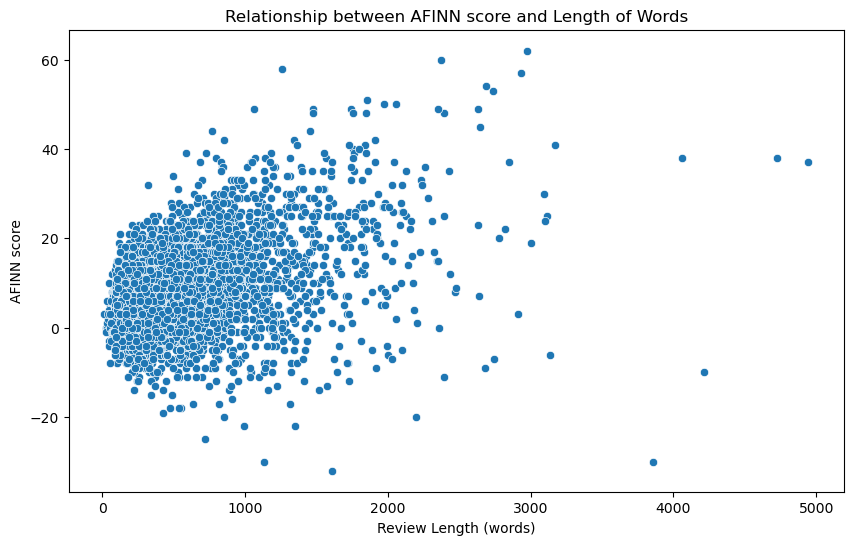

In [63]:
import seaborn as sns

# Plotting the relationship between AFINN score and length of words using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mother, x='Review Length (words)', y='AFINN score')
plt.xlabel('Review Length (words)')
plt.ylabel('AFINN score')
plt.title('Relationship between AFINN score and Length of Words')
plt.show()


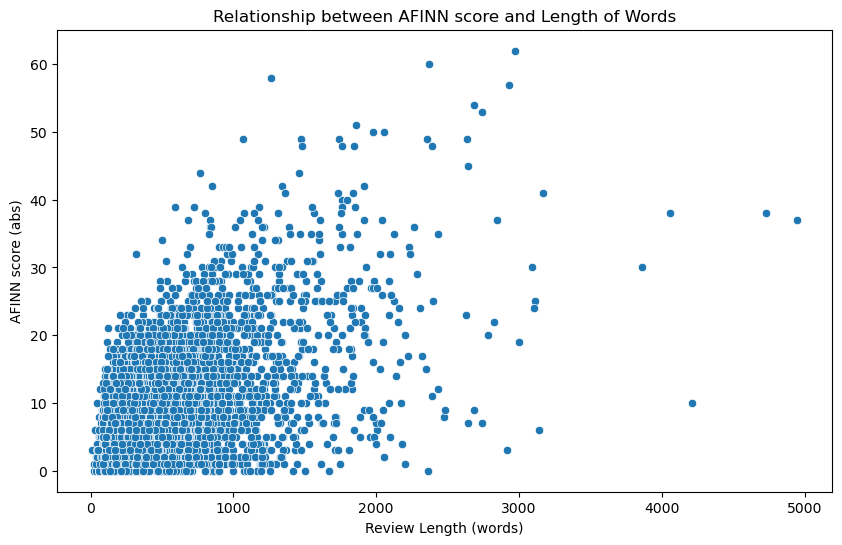

In [64]:
mother['AFINN score (abs)'] = mother['AFINN score'].abs()
# Plotting the relationship between the absolute AFINN score and length of words using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mother, x='Review Length (words)', y='AFINN score (abs)')
plt.xlabel('Review Length (words)')
plt.ylabel('AFINN score (abs)')
plt.title('Relationship between AFINN score and Length of Words')
plt.show()

Looks like we get an increasing relationship with the length of the review. What if we take a per-word approach, by dividing by the number of words?

In [65]:
def afinn_score_norm(text):
    words = text.split(' ')
    return afinn.score(text)/len(words)

mother['Normalised AFINN score'] = mother['text'].apply(afinn_score_norm)
mother

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,AFINN score,Review Length (words),AFINN score (abs),Normalised AFINN score
4177277,7OGJcQcbxTWzE1z1_UrmMw,I3f0Ww0Fh5-ixwxMQ5L1Cg,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,A visit to New Orleans is not complete without...,2015-11-06 01:44:28,4.0,383,4.0,0.052632
4177487,Mx0TaJzAU6HJHzEZQjXWfA,wgtJ6oS_VIZT_yVz3N5w3Q,iSRTaT9WngzB8JJ2YKJUig,4.0,0,0,0,The Ferdi was only amazing because of the debr...,2012-12-04 22:34:30,5.0,216,5.0,0.125000
4177714,MdOQyLBT5ro3yCvtMiI-nQ,9BzlclzAH_XdTOijPQZaOw,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,This is a regular stop for me when I am in new...,2016-06-12 00:55:19,6.0,257,6.0,0.120000
4177784,oYzqWxH6tDMSVQTNHCoOAA,9jWSprR9OJL4WW1P5iGToQ,iSRTaT9WngzB8JJ2YKJUig,1.0,1,0,0,This place gave my fiancé food poisoning today...,2016-01-04 02:48:37,-4.0,147,4.0,-0.153846
4177849,2uG8E1o4KTUDn47RB9JaVA,_KNqLK8xC4xBOCz3Q7MOag,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,I tried the spaghetti and meatballs. It was a ...,2018-06-08 22:29:13,9.0,147,9.0,0.360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880478,bIbJqBreln8Ai9CbY13AuQ,n-6gqoEP9uQQBUnbKIu3RQ,iSRTaT9WngzB8JJ2YKJUig,4.0,1,0,1,I came for the oyster po-boy and it did not di...,2017-11-20 06:35:37,3.0,170,3.0,0.085714
4880861,IW2iTKvna_F7vBrG3m4XyA,u7Zm1dTW2uLQhMXuazi9dg,iSRTaT9WngzB8JJ2YKJUig,3.0,3,0,0,Overrated and pretty ordinary Cajun food rattl...,2021-08-19 18:33:58,5.0,105,5.0,0.277778
4881067,5V74xBH_0CIiVrESPSoLjQ,IoZfBwHCO244npWM6EVhZA,iSRTaT9WngzB8JJ2YKJUig,1.0,2,0,0,Total tourist trap. Avoid. Prices are high; fo...,2018-03-12 15:32:26,-2.0,98,2.0,-0.142857
4881268,gUi186cOoWWe3OdVd2Cgag,hPUvonMwlxn_uX3UE13gzA,iSRTaT9WngzB8JJ2YKJUig,3.0,1,0,0,I truly do not understand the hype of this pla...,2021-08-23 03:48:09,6.0,318,6.0,0.093750


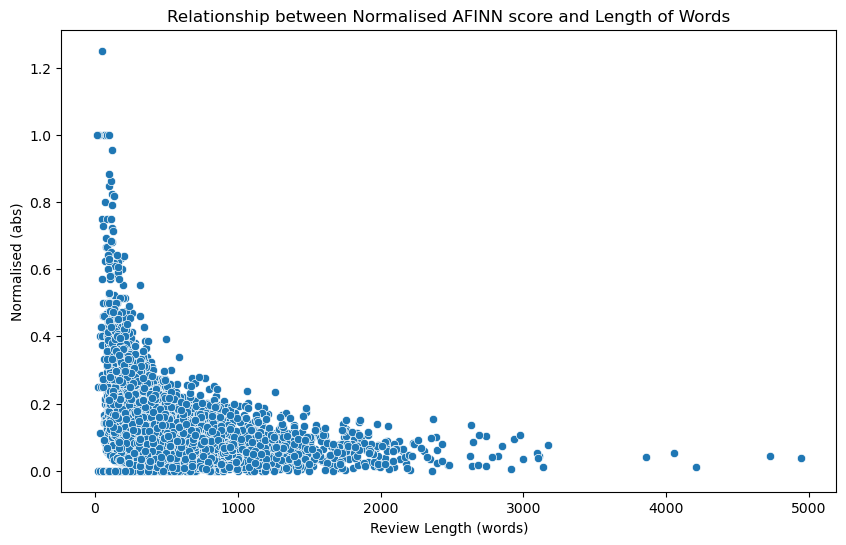

In [66]:
mother['Normalised (abs)'] = mother['Normalised AFINN score'].abs()

# Plotting the relationship between AFINN score and length of words using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mother, x='Review Length (words)', y='Normalised (abs)')
plt.xlabel('Review Length (words)')
plt.ylabel('Normalised (abs)')
plt.title('Relationship between Normalised AFINN score and Length of Words')
plt.show()

Not quite right. Actually, because a new word can both increase or decrease the total score, we would expect the score to increase with the squareroot of the length of the review.

In [67]:
import math
mother['SQRT Normailzed'] = mother['AFINN score'] / mother['Review Length (words)'].apply(math.sqrt)
mother["SQRT Normalised (abs)"] = mother['AFINN score (abs)']/mother['Review Length (words)'].apply(math.sqrt)
mother

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,AFINN score,Review Length (words),AFINN score (abs),Normalised AFINN score,Normalised (abs),SQRT Normailzed,SQRT Normalised (abs)
4177277,7OGJcQcbxTWzE1z1_UrmMw,I3f0Ww0Fh5-ixwxMQ5L1Cg,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,A visit to New Orleans is not complete without...,2015-11-06 01:44:28,4.0,383,4.0,0.052632,0.052632,0.204390,0.204390
4177487,Mx0TaJzAU6HJHzEZQjXWfA,wgtJ6oS_VIZT_yVz3N5w3Q,iSRTaT9WngzB8JJ2YKJUig,4.0,0,0,0,The Ferdi was only amazing because of the debr...,2012-12-04 22:34:30,5.0,216,5.0,0.125000,0.125000,0.340207,0.340207
4177714,MdOQyLBT5ro3yCvtMiI-nQ,9BzlclzAH_XdTOijPQZaOw,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,This is a regular stop for me when I am in new...,2016-06-12 00:55:19,6.0,257,6.0,0.120000,0.120000,0.374270,0.374270
4177784,oYzqWxH6tDMSVQTNHCoOAA,9jWSprR9OJL4WW1P5iGToQ,iSRTaT9WngzB8JJ2YKJUig,1.0,1,0,0,This place gave my fiancé food poisoning today...,2016-01-04 02:48:37,-4.0,147,4.0,-0.153846,0.153846,-0.329914,0.329914
4177849,2uG8E1o4KTUDn47RB9JaVA,_KNqLK8xC4xBOCz3Q7MOag,iSRTaT9WngzB8JJ2YKJUig,5.0,0,0,0,I tried the spaghetti and meatballs. It was a ...,2018-06-08 22:29:13,9.0,147,9.0,0.360000,0.360000,0.742307,0.742307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880478,bIbJqBreln8Ai9CbY13AuQ,n-6gqoEP9uQQBUnbKIu3RQ,iSRTaT9WngzB8JJ2YKJUig,4.0,1,0,1,I came for the oyster po-boy and it did not di...,2017-11-20 06:35:37,3.0,170,3.0,0.085714,0.085714,0.230089,0.230089
4880861,IW2iTKvna_F7vBrG3m4XyA,u7Zm1dTW2uLQhMXuazi9dg,iSRTaT9WngzB8JJ2YKJUig,3.0,3,0,0,Overrated and pretty ordinary Cajun food rattl...,2021-08-19 18:33:58,5.0,105,5.0,0.277778,0.277778,0.487950,0.487950
4881067,5V74xBH_0CIiVrESPSoLjQ,IoZfBwHCO244npWM6EVhZA,iSRTaT9WngzB8JJ2YKJUig,1.0,2,0,0,Total tourist trap. Avoid. Prices are high; fo...,2018-03-12 15:32:26,-2.0,98,2.0,-0.142857,0.142857,-0.202031,0.202031
4881268,gUi186cOoWWe3OdVd2Cgag,hPUvonMwlxn_uX3UE13gzA,iSRTaT9WngzB8JJ2YKJUig,3.0,1,0,0,I truly do not understand the hype of this pla...,2021-08-23 03:48:09,6.0,318,6.0,0.093750,0.093750,0.336463,0.336463


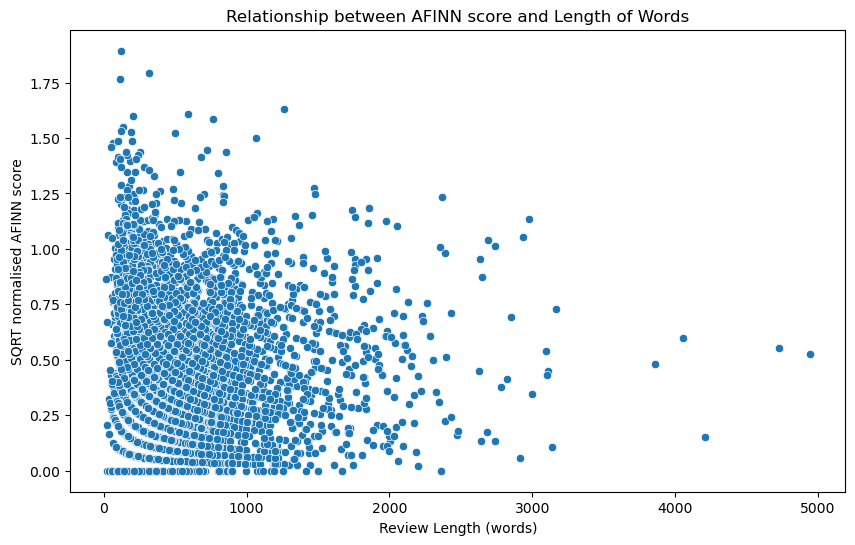

In [68]:
# Plotting the relationship between AFINN score and length of words using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mother, x='Review Length (words)', y="SQRT Normalised (abs)")
plt.xlabel('Review Length (words)')
plt.ylabel('SQRT normalised AFINN score')
plt.title('Relationship between AFINN score and Length of Words')
plt.show()

In [71]:
# Calculate the correlation between 'Magnitude Score' and 'Review Length (words)'
correlationSQRT = mother['SQRT Normalised (abs)'].corr(mother['Review Length (words)'])
correlationNorm = mother['Normalised (abs)'].corr(mother['Review Length (words)'])
correlationTotal = mother['AFINN score (abs)'].corr(mother['Review Length (words)'])

# Print the correlation value
print("CorrelationSQRT:", correlationSQRT)
print("CorrelationNorm:", correlationNorm)
print("CorrelationTotal:", correlationTotal)

CorrelationSQRT: 0.022370092297600338
CorrelationNorm: -0.3484420791721194
CorrelationTotal: 0.5169646166925523


We get an almost zero colleration with SQRT, looks like this is suitable to normalise our data

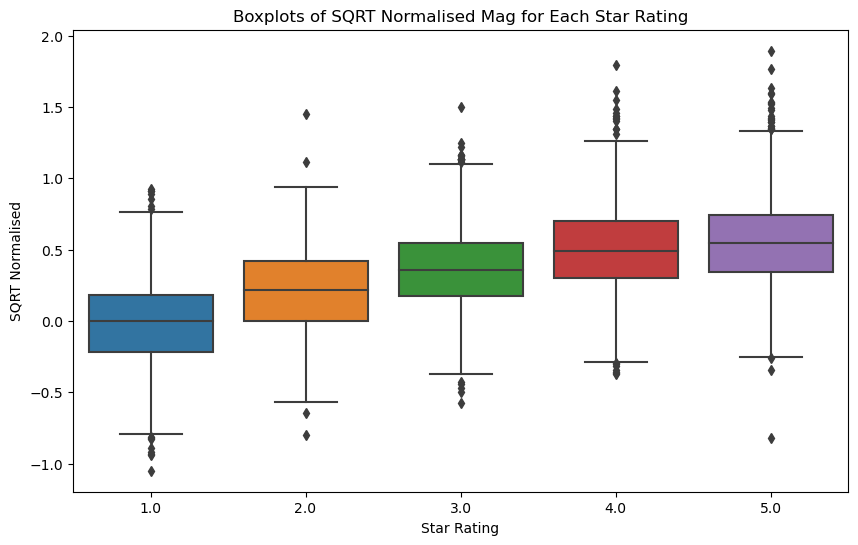

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=mother, x='stars', y='SQRT Normailzed')
plt.xlabel('Star Rating')
plt.ylabel('SQRT Normalised')
plt.title('Boxplots of SQRT Normalised Mag for Each Star Rating')
plt.show()

### Hypothesis: AFINN score has a positive relationship with star rating.

#### Null Hypothesis: There is no significant relationship between AFINN score and star rating

We see an overall upwards trend. We can run a pearson test to check if we have a statistically significant relationship. We'll say that a p value of <0.05 is sufficient to reject our null hypothesis.

In [77]:
from scipy.stats import pearsonr

# Assuming the "mother" dataframe already exists
y = 'SQRT Normailzed'
x = 'stars'

# Extract the relevant columns from the dataframe
data = mother[[y, x]].dropna()

# Calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(data[y], data[x])

# Print the results
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.5124637116720343
P-value: 0.0


With the P-value being effectively 0, we can reject our null hypothesis.
We can also conclude that there is a positive correlation between star rating and AFINN score.

# Observations

Interestingly, there were a number of 5 star reviews with a negative AFINN score. Let's take a look

In [82]:
weird = mother[(mother['stars'] == 5) & (mother['SQRT Normailzed']<0)]
c = 0
for text in weird['text']:
    c += 1
    print("\n")
    print(c)
    print(text)




1
A tradition that should be upheld by generations to come. My dad dined here in the 80's and I make a point to stop in for a po-boy whenever I'm in town! Stop by here for a real taste of authentic Nola.


2
Hard to believe this isn't all five stars. Exceptional service, and we refused to Obey the signs that said no tipping and tipped! These were the best Poboys we had in all of New Orleans.


3
Get the BOURBON BREAD PUDDING. 

If you're reading this and don't get it, you made the worst decision ever. Go home, you're drunk. 

Moving on... The portions are pretty big, so be ready to eat a lot or share your food. There's always a line, but it moves pretty fast.  

Get the BOURBON BREAD PUDDING.


4
We hit it at 3:30 and had no trouble getting in and getting full! We tried the night before and the kids could not wait outside in the evening heat. Once we got in the kids each picked out something and they made it to order and they were in heaven! Everyone ate more than they should have an

Lets take a look at no. 23, which yielded a score of -8.0
```
No review of Mother's ought to matter - be it a hater's "one-star" or an infatuants five-star.  Mother's is above all this nonsense.

Mother's knows you're going to come.  Mother's even knows the skeptics among us, and more importantly, doesn't care about any skepticism.  Skepticism generally involves not delivering expectations and if one hasn't had mother's, one can't know what to expect.

If the metrics were linear, then maybe.  The metrics are 3D-based and Mothers brings you to a destination with no parallel.  Bottom line: remember the Z axis here.

I've been to Mother's not that many times - only 1/2 dozen over the past 26 years.  That said, the experience is virtually identical each time.

I'm not going to bore you with my experience. It won't be the same as yours anyway.  The only thing we'll have in common is that we'll always have Mother's.  

Oh - and one last thing.  If you've not yet been to Mother's, it's only a matter of time.
```

While the overall sentiment of this review is very positive, the use of satirical language throws off our model completely.

# Conclusion

In conclusion, this project highlighted the potential of using sentiment analysis to gain insights from Yelp reviews 


We also highighlted the importance of considering language nuances. It also pointed towards future areas of research, such as using more sophisticated NLP techniques to better capture the intricacies of language used in reviews. We could also make better use of text cleaning techniques like lemmatization to yield more effective results.